# **Quantum Phase Estimation Algorithm (QPE) - Qiskit**

## Install Dependencies

In [ ]:
pip install qiskit --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer --quiet

In [ ]:
pip install -U qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 17.8 MB/s eta 0:00:00


In [1]:
pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
pip install matplotlib --quiet

## Insert Libraries

In [ ]:
# Insert all the libraries that we will need
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT, PhaseGate
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit import ClassicalRegister

## Define Phase Estimation Circuit Function

In [ ]:
# Define Phase Estimation Circuit Function - REVERSE ORDER

def phase_estimation_circuit_reversed(t, unitary):
    # Create a Quantum Circuit with t+1 qubits (t for counting, 1 for eigenstate)
    # t+1 qubits and t classical bits.
    qc = QuantumCircuit(t + 1, t)

    # Apply Hadamard gates to counting qubits
    #qc.h(0)
    #qc.h(1)
    #qc.h(2)
    for qubit in range(t):
        qc.h(qubit)

    state_vector = [0,1]
    qc.initialize(state_vector, t)

    # Prepare the eigenstate |1> in the last qubit

    qc.x(t)

    # Apply the controlled-unitary operations
    repetitions = 1
    #how many times the controlled unitary gate should be applied for each counting qubit.
    for counting_qubit in range(t):
    #This loop iterates over each counting qubit in the register.
    #The variable t represents the total number of counting qubits.
        for _ in range(repetitions):
        # This inner loop runs repetitions times,
        # which starts at 1 and doubles with each iteration of the outer loop.
            controlled_gate = unitary.control()
            # Creates a controlled version of the unitary gate U.
            # the gate U will be applied to the target qubit only if the control qubit is in the state |1⟩.
            qc.append(controlled_gate, [t-counting_qubit-1, t])
            # This line appends the controlled gate to the quantum circuit.
            # The control qubit is indexed by t - counting_qubit - 1 to ensure the highest power of U
            # is applied first, aligning with the reverse order logic.
            # The target qubit is always the last qubit (indexed by t).
        repetitions *= 2


    # Apply inverse Quantum Fourier Transform
    qc.append(QFT(num_qubits=t, do_swaps=False).inverse(), range(t))

    # Measure
    qc.measure(range(t), range(t))

    return qc

## Prepare the Circuit

In [ ]:
# Prepare the Circuit

# Define the unitary (a phase shift of pi/4)
unitary = PhaseGate(math.pi)

# Number of qubits for the counting register
t = 3


In [ ]:
# Get the circuit
qc = phase_estimation_circuit_reversed(t, unitary)

# Choose the backend
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

## Run the circuit on the simulator

In [ ]:
# Run the transpiled circuit on the simulator
job = simulator.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

## Results

In [ ]:
print (counts)

{'000': 1024}


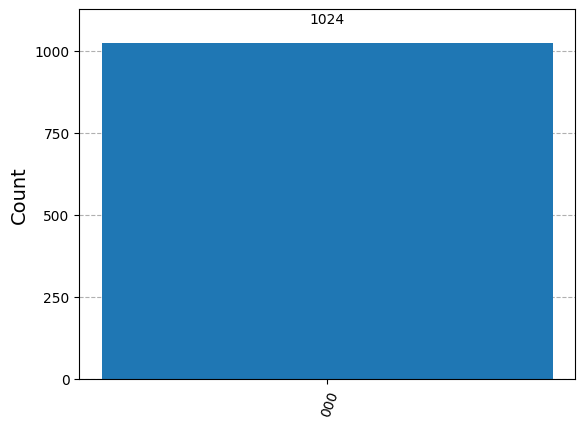

In [ ]:
# Plot the results
plot_histogram(counts)

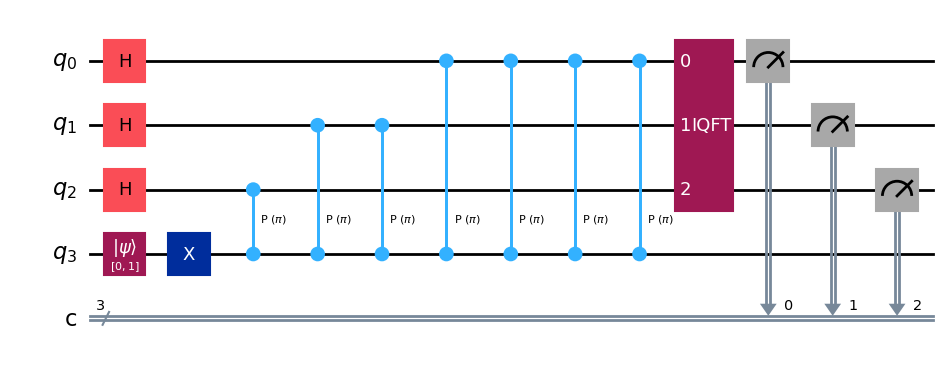

In [ ]:
qc.draw(output='mpl')

In [ ]:
qc.draw()

┌───┐                                                             »
q_0: ───────┤ H ├──────────────────────────────────■──────■──────■──────■─────»
            ├───┤                                  │      │      │      │     »
q_1: ───────┤ H ├────────────────────■──────■──────┼──────┼──────┼──────┼─────»
            ├───┤                    │      │      │      │      │      │     »
q_2: ───────┤ H ├─────────────■──────┼──────┼──────┼──────┼──────┼──────┼─────»
     ┌──────┴───┴──────┐┌───┐ │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π) »
q_3: ┤ Initialize(0,1) ├┤ X ├─■──────■──────■──────■──────■──────■──────■─────»
     └─────────────────┘└───┘                                                 »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌───────┐┌─┐      
«q_0: ┤0      ├┤M├──────
«     │       │└╥┘┌─┐   
«q_1: ┤1 IQFT ├─╫─┤M├───
«     │       │ ║ └╥┘┌─┐
«q_2: ┤2      ├─╫──╫─┤M├
«     └───────┘ ║  ║ └╥┘
«q_3: ──────────╫──╫──╫─
«               ║  ║  ║ 
«c: 3/══════════╩══╩══╩═
«               0  1  2

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Calculate and Print Phase Estimates

In [ ]:
# Calculate and Print Phase Estimates

# Convert binary strings to phase estimates
def binary_to_phase(binary_string, qubits):
    # Convert binary string to decimal
    decimal = int(binary_string, 2)
    # Convert decimal to phase
    phase = (decimal / (2 ** qubits)) * 2 * math.pi
    return phase

# Process counts and determine the phase estimate
max_count = 0
estimated_phase = None

for binary_result, count in counts.items():
    phase = binary_to_phase(binary_result, t)
    print(f"Binary: {binary_result} | Phase: {phase:.4f} radians")
    # Track the most probable phase
    if count > max_count:
        max_count = count
        estimated_phase = phase

# Display the estimated phase
print(f"\nThe estimated phase based on the most frequent result is: {estimated_phase:.4f} radians")


Binary: 000 | Phase: 0.0000 radians

The estimated phase based on the most frequent result is: 0.0000 radians
